In [1]:
#routes
home_path = '/home/emma/Desktop/sci_projects/speech_analysis_module/'
sample_dir = home_path + 'speech_analysis_module/samples/'

In [2]:
#!pip install speech-analysis-module


In [2]:
import speech_analysis_module as sam
from speech_analysis_module.utils import load_audio, save_audio, play, get_files, to_text, array_to_text
from speech_analysis_module.plot import oscilo, spectro
from speech_analysis_module.analysis import psd, envelope, welch
from speech_analysis_module.prepro import bandpass_filter, noise_gate, trim_adjust
from speech_analysis_module.features import extract_features
from speech_analysis_module.psychopy import recorder

import os
import inspect

In [3]:

help(sam)
#print(dir(speech_analysis_module))
#print(dir(sam))
#print(dir(sam.utils))

submodules = [sam.utils, sam.prepro, sam.plot, sam.analysis, sam.features, sam.psychopy.recorder]

for module in submodules:
    print(f"\n📦 Module: {module.__name__}")

    # List top-level functions
    functions = inspect.getmembers(module, inspect.isfunction)
    if functions:
        print("  🔧 Functions:")
        for name, func in functions:
            print(f"    🔹 {name}")

    # List classes and their methods
    classes = inspect.getmembers(module, inspect.isclass)
    if classes:
        print("  🧱 Classes:")
        for cls_name, cls in classes:
            print(f"    📘 {cls_name}")
            methods = inspect.getmembers(cls, predicate=inspect.isfunction)
            for method_name, _ in methods:
                if not method_name.startswith("__"):
                    print(f"      🔸 {method_name}")


Help on package speech_analysis_module:

NAME
    speech_analysis_module

PACKAGE CONTENTS
    analysis (package)
    features (package)
    plot (package)
    prepro (package)
    psychopy (package)
    speech_analysis_module
    utils (package)

DATA
    __all__ = ['utils', 'prepro', 'plot', 'analysis', 'features', 'psychop...

FILE
    /home/emma/Desktop/sci_projects/speech_analysis_module/speech_analysis_module/__init__.py



📦 Module: speech_analysis_module.utils
  🔧 Functions:
    🔹 array_to_text
    🔹 get_files
    🔹 load_audio
    🔹 play
    🔹 save_audio
    🔹 to_text

📦 Module: speech_analysis_module.prepro
  🔧 Functions:
    🔹 bandpass_filter
    🔹 noise_gate
    🔹 trim_adjust

📦 Module: speech_analysis_module.plot
  🔧 Functions:
    🔹 density
    🔹 oscilo
    🔹 spectro

📦 Module: speech_analysis_module.analysis
  🔧 Functions:
    🔹 envelope
    🔹 psd
    🔹 welch

📦 Module: speech_analysis_module.features
  🔧 Functions:
    🔹 extract_features

📦 Module: speech_analysis_module

Found 5 files: ['05.wav', '04.wav', '03.wav', '02.wav', '01.wav']


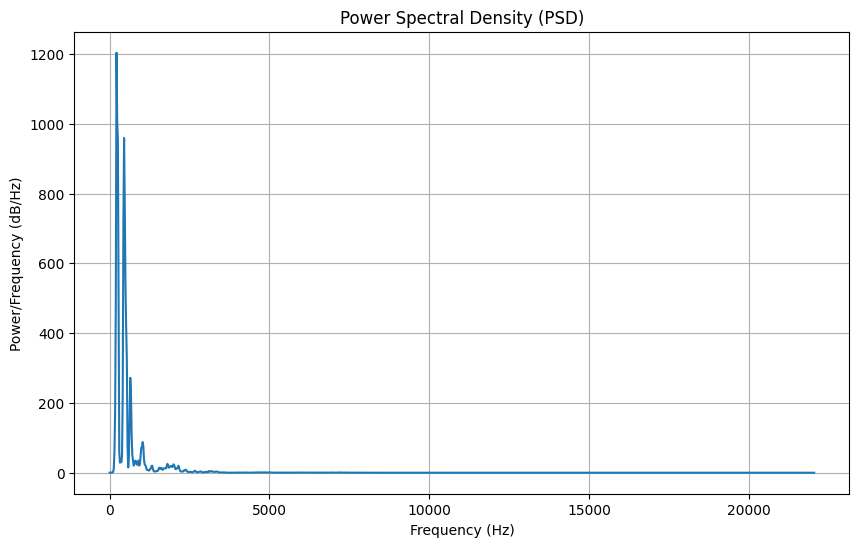

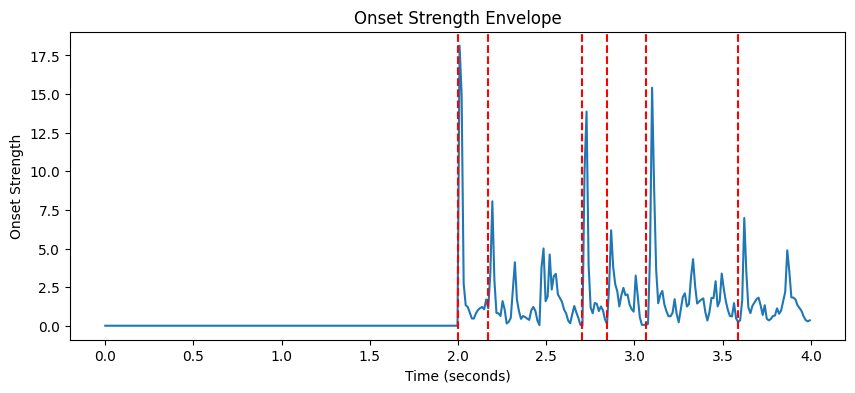

reaction time: 1.9969160997732427 seconds
Playing audio... Duration: 4.0 seconds


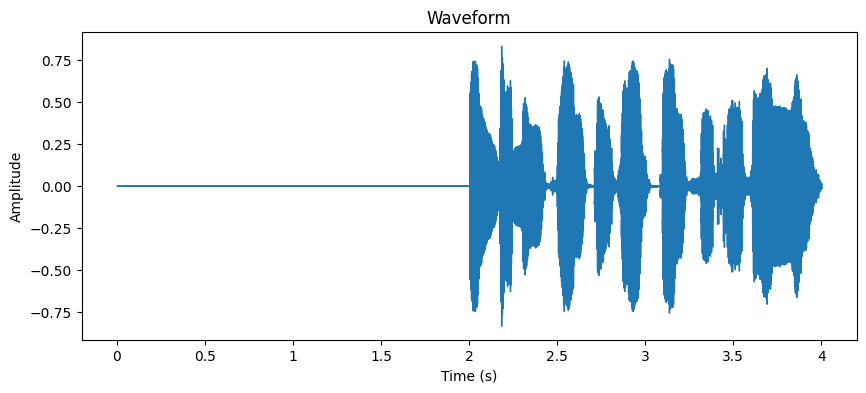

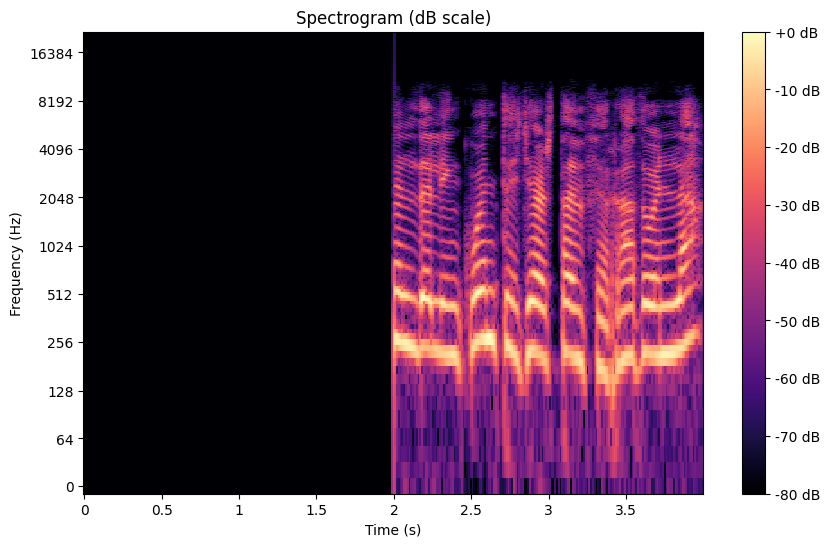

original duration was 4.0, trimmed duration is 2.0030839002267573
adjusted duration is 4.0


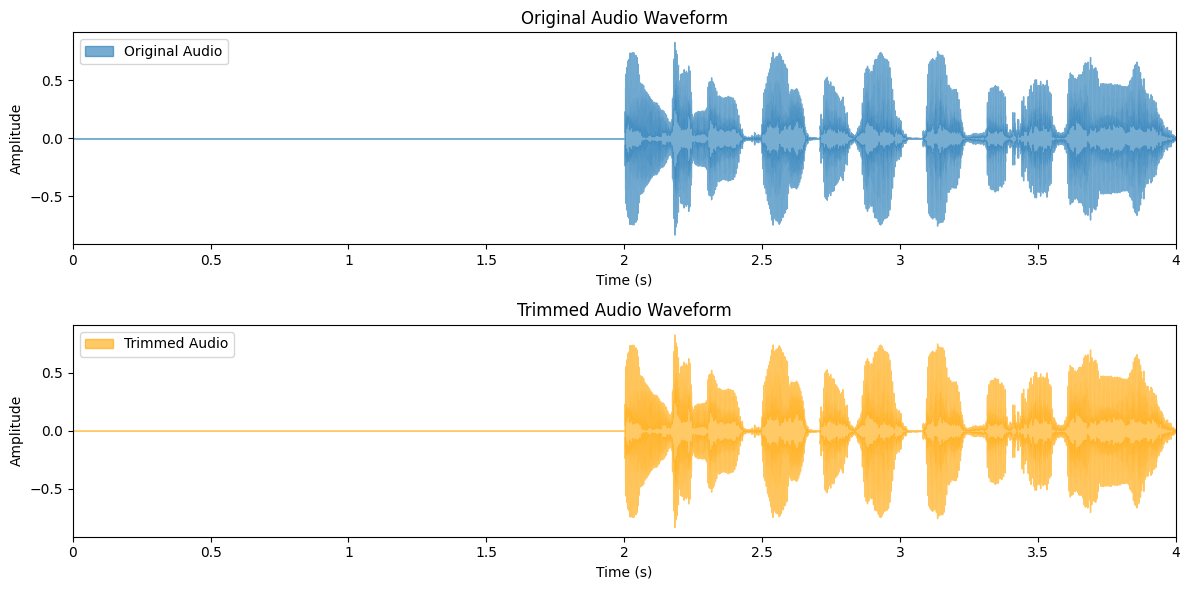

 ¡Ha, ha, ha, ha, ha pikeí stars y reosphere!


' ¡Ha, ha, ha, ha, ha pikeí stars y reosphere!'

In [7]:
#We load the sample files to work
file_test = get_files(sample_dir, extensions=[".wav"]) #we can setup the extension to only get one type of file

#Here we select one to work
test_path = os.path.join(sample_dir, file_test[2])

#To load an audio file we also unpack the sampling rate
audio, sr = load_audio(test_path)

#We can preprocess (filter and gate) our signal to improve the onset detection
audio = bandpass_filter(audio, sr, lowcut=20, highcut=7000, order=5)
audio = noise_gate(audio, sr, threshold_in_db=-30, attack_time=0.01, release_time=0.1)

#There are 2 methods to work with frequencies
stft, psd_values, freqs = psd(audio, sr, n_fft=2048, plot=True) #Allows you to get the spectrogram of the signal (based on librosa)
#psd_values, freqs = welch(audio, sr, n_fft=2048, db=False, plot=True) #Generally better (based on signal.welch)

#This function alllows us to get the envelope of the signal, plus get the different onsets in the audio
onset_env, time_env, onset_times, onset_strengths = envelope(audio, sr, backtrack=True, plot=True, show_onsets=True, delta=0.2)
print(f"reaction time: {onset_times[0]} seconds")

#There are many methods of visualization
play(audio, sr)
oscilo(audio, sr)
spectro(stft, sr)
#density(psd_values, freqs, db=False)

#This is a stimuli prepration method that allows us to remove unvoiced segments, adjust the duration of the audio, indent...
ajusted_audio, interval= trim_adjust(audio, sr, top_db=30, frame_length=1024, hop_length=512, final_duration=4, indent_side='right', plot=True)

#We can also use whisper to transcribe (although it is not very effective...)
to_text(test_path, model="base", device="cpu", language="es", verbose=True)



In [5]:
feats = extract_features(audio, sr)

[Warning] Jitter/Shimmer extraction failed: Command "Get jitter (local)" not available for given objects.


In [6]:
print(feats)


{'pitch_mean': np.float64(178.2898265430022), 'pitch_std': np.float64(52.9418964376956), 'harmonicity_mean': np.float64(10.360922888432368), 'jitter_local': nan, 'shimmer_local': nan, 'zcr_mean': np.float64(0.014572930090206186), 'spectral_centroid_mean': np.float64(275.75884205743154), 'spectral_bandwidth_mean': np.float64(318.50639946110226), 'spectral_rolloff_mean': np.float64(515.1014819587629), 'rms_mean': np.float32(0.017675383), 'mfcc_1_mean': np.float64(-541.7698413338325), 'mfcc_2_mean': np.float64(44.68776112803683), 'mfcc_3_mean': np.float64(-1.0636880402898792)}
